# Accelerometer Preprocessing and Transforming

In [11]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt, firwin, lfilter, freqz
import matplotlib.pyplot as plt
from scipy.signal.windows import hamming
from spectrum import pburg

In [12]:
raw_data_path = '/Users/patriciawatanabe/Projects/Neurotech/NTUT25_Software/data/accelerometer/processed/tremor_labels_801_1_accelerometer.pkl'

In [13]:
# Load the raw accelerometer data
try:
    # Load the data, which is a numpy array
    accel_data_array = pd.read_pickle(raw_data_path)
    # Convert the transposed array to a pandas DataFrame with x, y, z columns
    df_accel = pd.DataFrame(accel_data_array, columns=['x', 'y', 'z','final_label'])
    print("Data loaded and converted to DataFrame successfully.")
    print(df_accel.head())
    
except FileNotFoundError:
    print(f"Error: The file at {raw_data_path} was not found.")
    df_accel = None

Data loaded and converted to DataFrame successfully.
             x             y            z  final_label
0  623823.3750 -9.969514e+05 -935598.0000            0
1  620121.9375 -9.979850e+05 -938785.6875            0
2  618349.6250 -1.001284e+06 -942259.4375            0
3  616810.9375 -1.005281e+06 -945407.1250            0
4  614162.6875 -1.008645e+06 -949929.6250            0


In [14]:
# Convert the entire DataFrame to float64 to ensure accurate calculations
if df_accel is not None:
    df_accel[['x', 'y', 'z']].astype(np.float64)
    print("\nDataFrame converted to float64 data type.")
    print(df_accel.head())


DataFrame converted to float64 data type.
             x             y            z  final_label
0  623823.3750 -9.969514e+05 -935598.0000            0
1  620121.9375 -9.979850e+05 -938785.6875            0
2  618349.6250 -1.001284e+06 -942259.4375            0
3  616810.9375 -1.005281e+06 -945407.1250            0
4  614162.6875 -1.008645e+06 -949929.6250            0


In [ ]:
tremor_indices = df_accel.loc[df_accel['final_label'] == 1].index
print(tremor_indices)

Index([ 2979,  2980,  2981,  2982,  2983,  2984,  2985,  2986,  2987,  2988,
       ...
       21968, 21969, 21970, 21971, 21972, 21973, 21974, 21975, 21976, 21977],
      dtype='int64', length=900)


In [40]:
tremor_indices = df_accel.loc[df_accel['final_label'] == 2].index
print(tremor_indices)

Index([ 3279,  3280,  3281,  3282,  3283,  3284,  3285,  3286,  3287,  3288,
       ...
       22301, 22302, 22303, 22304, 22305, 22306, 22307, 22308, 22309, 22310],
      dtype='int64', length=1072)


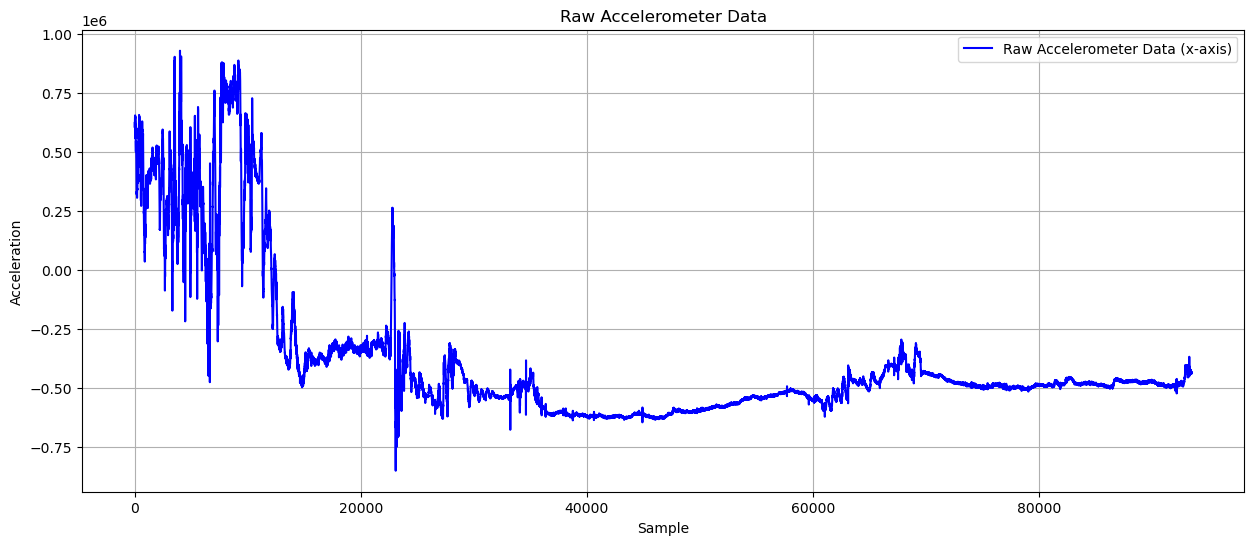

In [16]:
if df_accel is not None:
    plt.figure(figsize=(15, 6))
    plt.plot(df_accel['x'], label='Raw Accelerometer Data (x-axis)', color='blue')
    plt.title('Raw Accelerometer Data')
    plt.xlabel('Sample')
    plt.ylabel('Acceleration')
    plt.legend()
    plt.grid(True)
    plt.show()

In [17]:
# We'll use a window size of 500 samples (5 seconds at 100 Hz)
moving_average_window = 500

# Select all columns except 'tremor'
cols_to_process = df_accel.drop(columns='final_label').columns

# Calculate the moving average for the selected columns
moving_average = df_accel[cols_to_process].rolling(
    window=moving_average_window,
    center=True
).mean()

# Subtract the moving average to remove drift
df_no_drift = df_accel[cols_to_process] - moving_average

# Drop the NaN values that result from the moving average calculation at the edges
df_no_drift = df_no_drift.dropna()

# Re-add the 'tremor' column to the no-drift DataFrame
df_no_drift['final_label'] = df_accel['final_label']

print("Drift removed from the data. First 5 rows of the new DataFrame:")
print(df_no_drift.head())

Drift removed from the data. First 5 rows of the new DataFrame:
                 x              y              z  final_label
250  -81730.286125    6689.587500 -153300.190000            0
251  -57997.090500  -33121.136625 -139961.825375            0
252  -43905.747688 -129845.143875 -123686.522125            0
253  -77284.225750 -271226.289750 -153724.605875            0
254 -124019.119125 -346936.119500 -216401.125750            0


In [18]:
# Assuming your DataFrame is named df
tremor_indices = df_no_drift.loc[df_no_drift['final_label'] == 1].index
print(tremor_indices)

Index([ 2979,  2980,  2981,  2982,  2983,  2984,  2985,  2986,  2987,  2988,
       ...
       21968, 21969, 21970, 21971, 21972, 21973, 21974, 21975, 21976, 21977],
      dtype='int64', length=900)


In [39]:
# Assuming your DataFrame is named df
tremor_indices = df_no_drift.loc[df_no_drift['final_label'] == 2].index
print(tremor_indices)

Index([ 3279,  3280,  3281,  3282,  3283,  3284,  3285,  3286,  3287,  3288,
       ...
       22301, 22302, 22303, 22304, 22305, 22306, 22307, 22308, 22309, 22310],
      dtype='int64', length=1072)


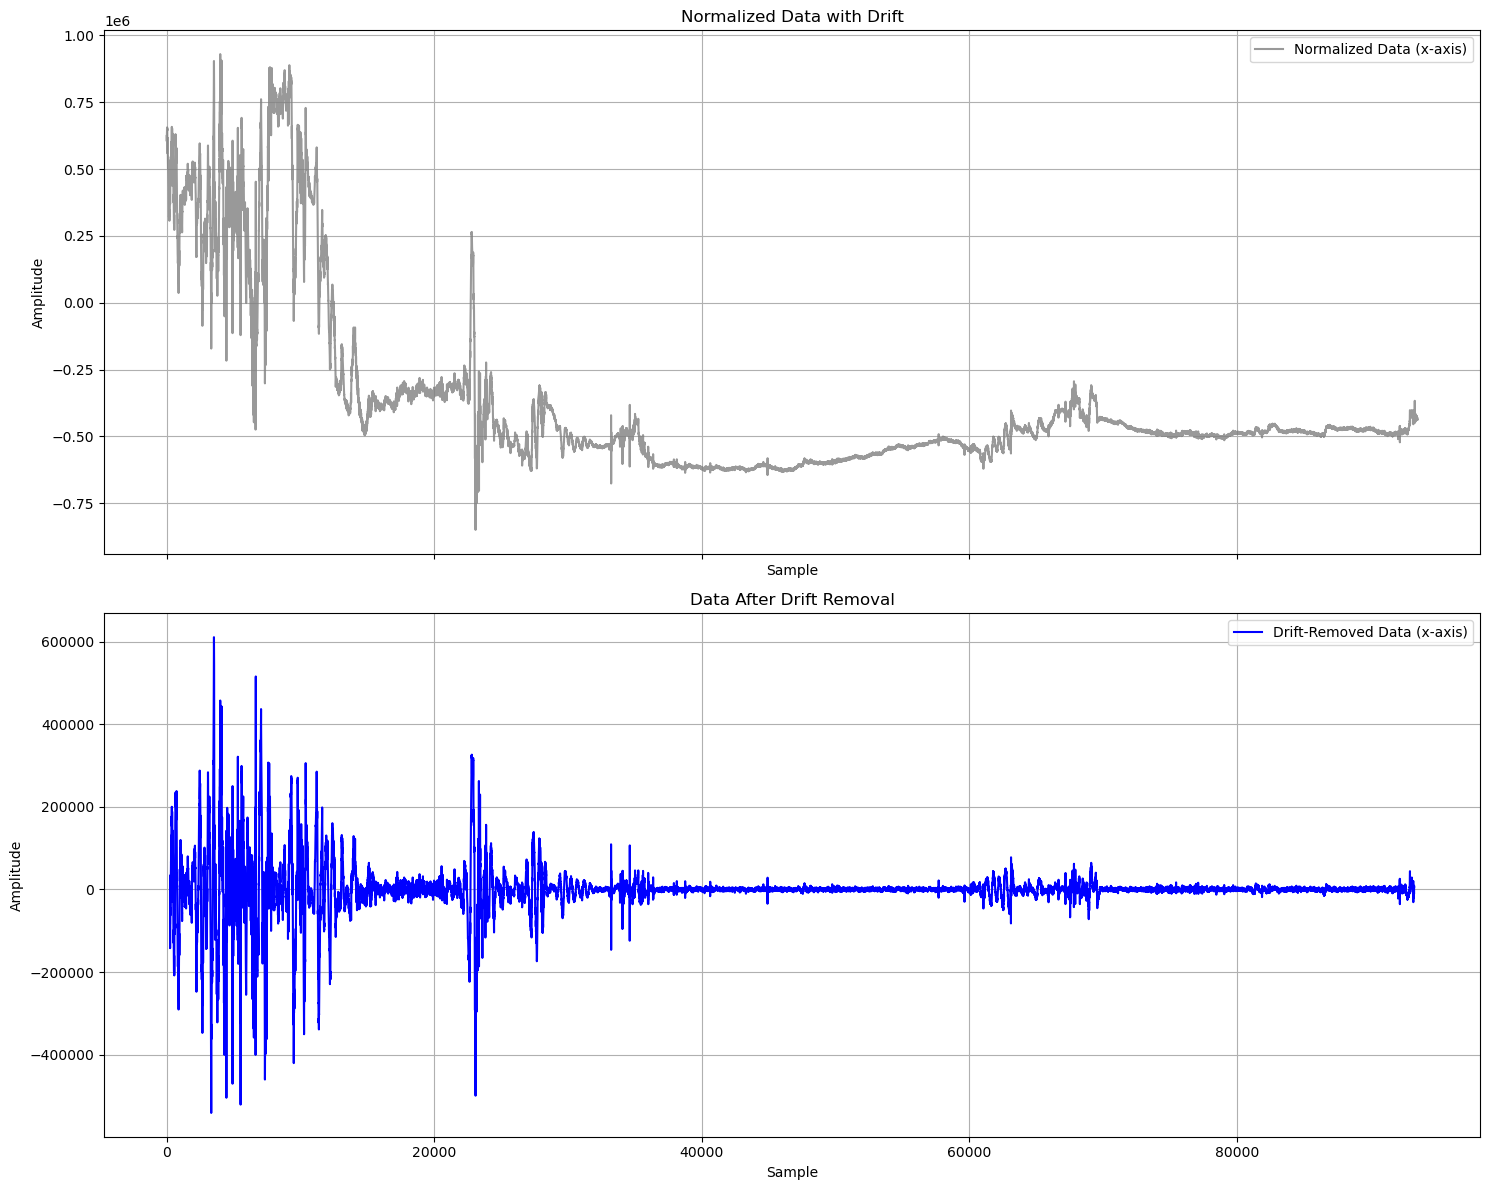

In [ ]:
if df_no_drift is not None and df_accel is not None:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

    # Plot 1: Normalized data with drift
    ax1.plot(df_accel['x'], label='Normalized Data (x-axis)', color='gray', alpha=0.8)
    ax1.set_title('Normalized Data with Drift')
    ax1.set_xlabel('Sample')
    ax1.set_ylabel('Amplitude')
    ax1.legend()
    ax1.grid(True)
    
    # Plot 2: Data with drift removed
    ax2.plot(df_no_drift['x'], label='Drift-Removed Data (x-axis)', color='blue')
    ax2.set_title('Data After Drift Removal')
    ax2.set_xlabel('Sample')
    ax2.set_ylabel('Amplitude')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

In [20]:
# Filter parameters from the paper
lowcut = 1.0  # Hz
highcut = 30.0 # Hz
fs = 100.0    # Sampling frequency in Hz
order = 100   # FIR filter order --> Not sure proof of concept

def fir_bandpass_filter_filtfilt(data, lowcut, highcut, fs, order):
    """
    Designs and applies a bandpass FIR filter using filtfilt for a zero-phase response.
    
    Args:
        data (pd.DataFrame): The input data to filter.
        lowcut (float): The low cutoff frequency in Hz.
        highcut (float): The high cutoff frequency in Hz.
        fs (float): The sampling frequency in Hz.
        order (int): The filter order.
    
    Returns:
        pd.DataFrame: The filtered data.
    """
    # nyquist = 0.5 * fs
    b = firwin(order + 1, [lowcut, highcut], pass_zero=False, fs=fs)
    
    # Apply the filter using filtfilt
    y = filtfilt(b, 1.0, data.values, axis=0)
    
    # Convert the filtered array back to a DataFrame with the same columns
    df_filtered_fir = pd.DataFrame(y, columns=data.columns)
    
    return df_filtered_fir

if df_no_drift is not None:
    cols_to_filter = df_no_drift.drop(columns='final_label').columns
    df_filtered_fir = fir_bandpass_filter_filtfilt(df_no_drift[cols_to_filter], lowcut, highcut, fs, order)
    df_filtered_fir['final_label'] = df_accel['final_label']
    print("Data filtered successfully with a zero-phase FIR filter.")
    print(df_filtered_fir.head())

Data filtered successfully with a zero-phase FIR filter.
              x              y             z  final_label
0  -1972.245801     161.427440  -3699.309893            0
1  22603.888668  -38698.910212  18345.339070            0
2  26029.148318 -142962.438389  31374.476291            0
3  -5715.321007 -282398.644486  11300.988774            0
4 -53871.785091 -359443.851294 -45761.329400            0


In [21]:
# Assuming your DataFrame is named df
tremor_indices = df_filtered_fir.loc[df_filtered_fir['final_label'] == 1].index
print(tremor_indices)

Index([ 2979,  2980,  2981,  2982,  2983,  2984,  2985,  2986,  2987,  2988,
       ...
       21968, 21969, 21970, 21971, 21972, 21973, 21974, 21975, 21976, 21977],
      dtype='int64', length=900)


In [41]:
tremor_indices = df_filtered_fir.loc[df_filtered_fir['final_label'] == 2].index
print(tremor_indices)

Index([ 3279,  3280,  3281,  3282,  3283,  3284,  3285,  3286,  3287,  3288,
       ...
       22301, 22302, 22303, 22304, 22305, 22306, 22307, 22308, 22309, 22310],
      dtype='int64', length=1072)


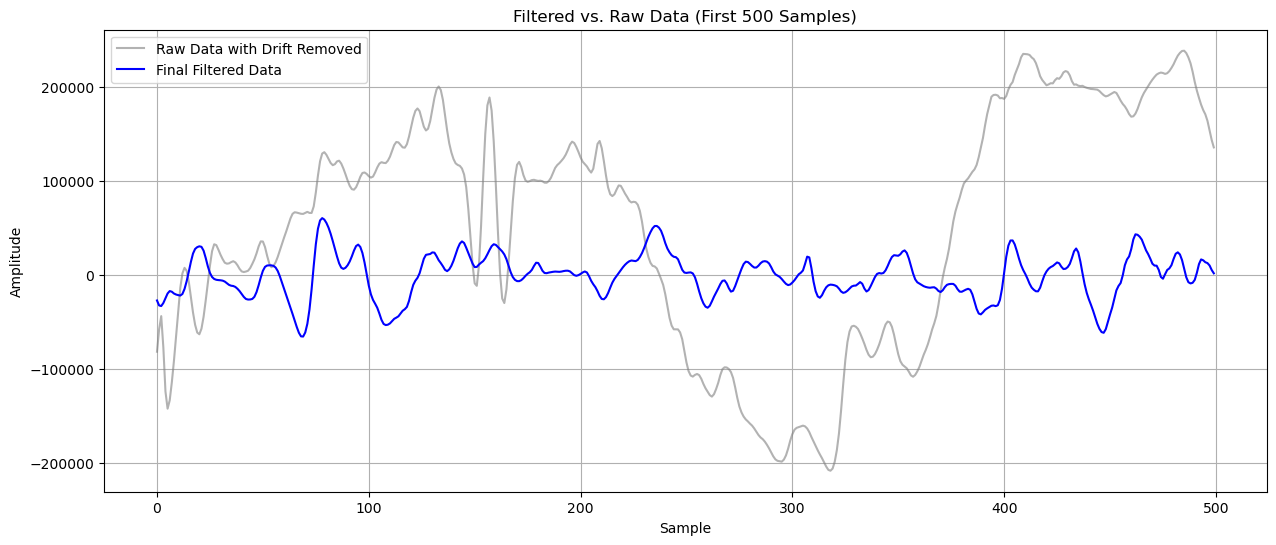

In [22]:
import matplotlib.pyplot as plt

# Get the starting index of the df_no_drift DataFrame
start_index = df_no_drift.index[0]

# Plot the two signals for the first 500 samples
plt.figure(figsize=(15, 6))
plt.plot(df_no_drift['x'].values[:500], label='Raw Data with Drift Removed', color='gray', alpha=0.6)
plt.plot(df_filtered_fir['x'].values[start_index:start_index+500], label='Final Filtered Data', color='blue')

plt.title('Filtered vs. Raw Data (First 500 Samples)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

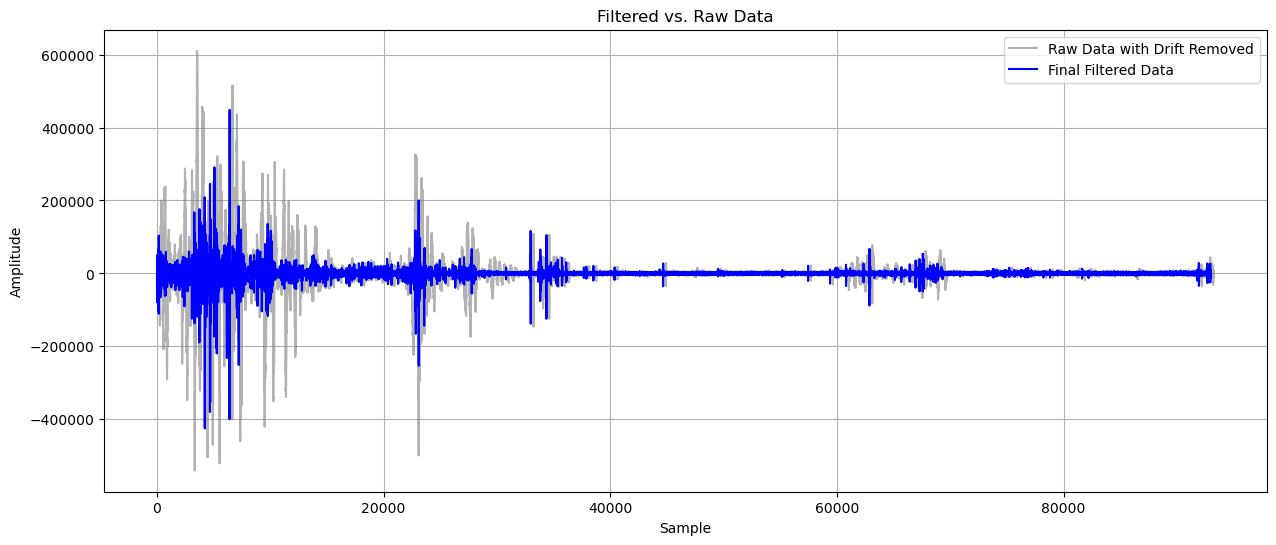

In [23]:
# Plot the two signals for the first 500 samples
plt.figure(figsize=(15, 6))
plt.plot(df_no_drift['x'], label='Raw Data with Drift Removed', color='gray', alpha=0.6)
plt.plot(df_filtered_fir['x'], label='Final Filtered Data', color='blue')

plt.title('Filtered vs. Raw Data')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Parameters from the paper
fs = 100.0  # Sampling frequency in Hz
window_duration = 3.0  # seconds
overlap_ratio = 0.90

# Calculate window and step sizes in samples
window_samples = int(window_duration * fs)
overlap_samples = int(overlap_ratio * window_samples)
step_samples = window_samples - overlap_samples

# Check the calculated values
print(f"Window size: {window_samples} samples")
print(f"Overlap: {overlap_samples} samples")
print(f"Step size: {step_samples} samples")

Window size: 300 samples
Overlap: 270 samples
Step size: 30 samples


In [44]:
def apply_sliding_window(data_series, window_samples, step_samples):
    """
    Applies a sliding Hamming window to a time series.
    
    Args:
        data_series (pd.Series): The time series data for one axis.
        window_samples (int): The number of samples in each window.
        step_samples (int): The number of samples to step for each window.

    Returns:
        list: A list of NumPy arrays, where each array is a windowed segment.
    """
    windowed_segments = []
    
    # Create the Hamming window array
    ham_window = hamming(window_samples, sym=True)
    
    # Iterate through the data with the specified step size
    for i in range(0, len(data_series) - window_samples + 1, step_samples):
        segment = data_series[i : i + window_samples].values
        # Apply the Hamming window element-wise
        windowed_segment = segment * ham_window
        windowed_segments.append(windowed_segment)
        
    return windowed_segments

def create_windowed_labels(label_series, window_samples, step_samples):
    """
    Creates labels for each window based on the original label series.
    A window's label is the highest-priority label (2 > 1 > 0) within it.
    
    Args:
        label_series (pd.Series): The original label series.
        window_samples (int): The number of samples in each window.
        step_samples (int): The number of samples to step for each window.

    Returns:
        list: A list of integers (0, 1, or 2) representing the label for each window.
    """
    windowed_labels = []
    
    # Iterate through the data with the specified step size
    for i in range(0, len(label_series) - window_samples + 1, step_samples):
        segment_labels = label_series.iloc[i : i + window_samples].values
        
        # Determine the final label for the window based on the highest value
        final_label = np.max(segment_labels)
        windowed_labels.append(int(final_label))
            
    return windowed_labels

# Apply windowing to each filtered axis
if df_filtered_fir is not None:
    windowed_data = {}
    
    # Apply windowing to the accelerometer axes
    for axis in ['x', 'y', 'z']:
        windowed_data[axis] = apply_sliding_window(df_filtered_fir[axis], window_samples, step_samples)
        
    # Create the windowed labels using the updated function
    windowed_labels = create_windowed_labels(df_filtered_fir['final_label'], window_samples, step_samples)
        
    print("\nWindowing completed for all axes.")
    print(f"Number of windows for x-axis: {len(windowed_data['x'])}")
    print(f"Number of windowed labels: {len(windowed_labels)}")
    print(f"First 10 windowed labels: {windowed_labels[:10]}")


Windowing completed for all axes.
Number of windows for x-axis: 3091
Number of windowed labels: 3091
First 10 windowed labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# Assuming your DataFrame is named df
# Convert the list to a Series to use pandas' boolean indexing
labels_series = pd.Series(windowed_labels)
# Use boolean indexing to find the indices where the value is 1
tremor_indices = labels_series[labels_series == 2].index.tolist()
print(len(tremor_indices))

66


In [47]:
pre_tremor_indices = labels_series[labels_series == 1].index.tolist()
print(len(pre_tremor_indices))

28


In [48]:
non_tremor_indices = labels_series[labels_series == 0].index.tolist()
print(len(non_tremor_indices))

2997


In [ ]:
tremor_count = windowed_labels.count(1)
print("Total count of tremor labels:", tremor_count)

Total count of tremor labels: 94


In [58]:
# windowed_labels list would look like
# windowed_data = {'x': [array1, array2, ...], 'y': [...], 'z': [...]}
# windowed_labels = [0, 1, 0, ...]

# Step 1: Convert the lists of windowed segments into 2D NumPy arrays
x_data = np.array(windowed_data['x'])
y_data = np.array(windowed_data['y'])
z_data = np.array(windowed_data['z'])

# Step 2: Stack the 2D arrays along a new axis to create the 3D array
# The shape will be (number_of_windows, number_of_samples, number_of_axes)
X_data = np.stack([x_data, y_data, z_data], axis=-1)

# Step 3: Convert the labels list to a NumPy array for the model's output
y_labels = np.array(windowed_labels)

# Print the final shapes to confirm
print("Shape of the final feature data (X_data):", X_data.shape)
print("Shape of the final labels (y_labels):", y_labels.shape)

Shape of the final feature data (X_data): (3091, 300, 3)
Shape of the final labels (y_labels): (3091,)


In [62]:
pre_tremor_indices = y_labels[y_labels == 1].tolist()
print(len(pre_tremor_indices))

28


In [63]:
non_tremor_indices = y_labels[y_labels == 0].tolist()
print(len(non_tremor_indices))

2997


In [64]:
tremor_indices = y_labels[y_labels == 2].tolist()
print(len(tremor_indices))

66


In [65]:
np.savez_compressed('tremor_data.npz', features=X_data, labels=y_labels)

print("Data saved successfully to tremor_data.npz")

Data saved successfully to tremor_data.npz


### Example Loading Transformed Data

In [67]:
# Load the compressed file
loaded_data = np.load('tremor_data.npz')

# Access the arrays using the keys you assigned when saving
# We named the arrays 'features' and 'labels'
X_train = loaded_data['features']
y_train = loaded_data['labels']

print("Data loaded successfully.")
print("Shape of loaded features (X_train):", X_train.shape)
print("Shape of loaded labels (y_train):", y_train.shape)
print("First 10 labels:", y_train[:10])
print("First 10 feature windows (X_train):", X_train[:10])

# It's good practice to close the loaded file
loaded_data.close()

Data loaded successfully.
Shape of loaded features (X_train): (3091, 300, 3)
Shape of loaded labels (y_train): (3091,)
First 10 labels: [0 0 0 0 0 0 0 0 0 0]
First 10 feature windows (X_train): [[[  -157.77966408     12.9141952    -295.94479144]
  [  1810.60677883  -3099.84313728   1469.49030618]
  [  2092.90493815 -11495.06659293   2522.70245489]
  ...
  [ -1475.14778726  10334.75113403   5372.25784284]
  [  -882.89718965  10970.51112255   4350.9688366 ]
  [  -223.57785604  11285.9086555    3160.60596855]]

 [[  2016.55978552  -2048.58347129  -2486.43659647]
  [  1498.11116076  -1694.52798477  -1902.81741225]
  [  1055.25471512  -1495.56503478  -1180.1258584 ]
  ...
  [  4644.76450674  -2694.26571225  -1928.97120044]
  [  4825.60575238  -2774.59577803  -1539.16863671]
  [  4697.71423596  -2936.49893788  -1031.58635703]]

 [[  -659.275304     3043.94433138    986.06120577]
  [  -335.16088833   2477.30624441    802.64029055]
  [    40.53591567   1561.90610437    397.2292036 ]
  ...
  [ 

# From here, not relevant for our purpose

In [ ]:
# windowed_data = {'x': [array1, array2, ...], 'y': [...], 'z': [...]}
# windowed_labels = [0, 1, 0, ...]
num_windows = len(windowed_labels)
window_length = len(windowed_data['x'][0])

# 1. Create a flattened array of all data points
# Stack the arrays from the dictionary to create a 3D NumPy array
x_data = np.array(windowed_data['x'])
y_data = np.array(windowed_data['y'])
z_data = np.array(windowed_data['z'])

# Stack along a new axis to get shape (num_windows, window_length, 3)
stacked_data = np.stack([x_data, y_data, z_data], axis=-1)

# Flatten the first two dimensions to create a 2D array for the DataFrame
flat_data = stacked_data.reshape(num_windows * window_length, 3)

# 2. Create the MultiIndex
# The segment IDs (e.g., [0, 0, 0, ..., 1, 1, 1, ...])
segment_ids = np.repeat(range(num_windows), window_length)
# The sample IDs within each segment (e.g., [0, 1, 2, ..., 0, 1, 2, ...])
sample_ids = np.tile(range(window_length), num_windows)

# Create the MultiIndex object
multi_index = pd.MultiIndex.from_arrays([segment_ids, sample_ids], names=['segment_id', 'sample_id'])

# 3. Create the final DataFrame
df_preprocessed = pd.DataFrame(flat_data, index=multi_index, columns=['x', 'y', 'z'])

# 4. Add the labels column, which is the same for all samples in a given segment
df_preprocessed['tremor_label'] = np.repeat(windowed_labels, window_length)

print("Final MultiIndex DataFrame created successfully.")
print(df_preprocessed.head(10))
print("\nDataFrame Shape:", df_preprocessed.shape)

Final MultiIndex DataFrame created successfully.
                                x             y             z  tremor_label
segment_id sample_id                                                       
0          0          -157.779664     12.914195   -295.944791             0
           1          1810.606779  -3099.843137   1469.490306             0
           2          2092.904938 -11495.066593   2522.702455             0
           3          -462.448253 -22849.943110    914.405772             0
           4         -4397.235307 -29339.276415  -3735.226761             0
           5         -6536.815669 -26291.126108  -8606.552567             0
           6         -5998.070945 -16220.792116 -10894.711370             0
           7         -4546.724266  -4673.464249 -10496.344484             0
           8         -3106.491631   4795.563754  -8667.486332             0
           9         -1114.387447  10968.582108  -6397.836024             0

DataFrame Shape: (927300, 4)


In [53]:
pre_tremor_indices = df_preprocessed.loc[df_preprocessed['tremor_label'] == 1].index
print(len(pre_tremor_indices))

8400


In [54]:
tremor_indices = df_preprocessed.loc[df_preprocessed['tremor_label'] == 2].index
print(len(tremor_indices))

19800


In [55]:
non_tremor_indices = df_preprocessed.loc[df_preprocessed['tremor_label'] == 0].index
print(len(non_tremor_indices))

899100


In [56]:
# Get the first segment from the x-axis
segment = windowed_data['x'][0]

# Print the values and stats of the segment
print("First 10 values of the segment:")
print(segment[:10])
print("\nStats of the segment:")
print(f"Max value: {np.max(segment):.4f}")
print(f"Min value: {np.min(segment):.4f}")
print(f"Mean value: {np.mean(segment):.4f}")

First 10 values of the segment:
[ -157.77966408  1810.60677883  2092.90493815  -462.44825327
 -4397.23530693 -6536.81566942 -5998.07094512 -4546.72426628
 -3106.49163089 -1114.38744678]

Stats of the segment:
Max value: 103223.1878
Min value: -108324.2906
Mean value: 1515.0112


In [57]:
# Get the first segment from the x-axis
segment = df_preprocessed['x'][0]

# Print the values and stats of the segment
print("First 10 values of the segment:")
print(segment[:10])
print("\nStats of the segment:")
print(f"Max value: {np.max(segment):.4f}")
print(f"Min value: {np.min(segment):.4f}")
print(f"Mean value: {np.mean(segment):.4f}")

First 10 values of the segment:
sample_id
0    -157.779664
1    1810.606779
2    2092.904938
3    -462.448253
4   -4397.235307
5   -6536.815669
6   -5998.070945
7   -4546.724266
8   -3106.491631
9   -1114.387447
Name: x, dtype: float64

Stats of the segment:
Max value: 103223.1878
Min value: -108324.2906
Mean value: 1515.0112


In [30]:
# Assuming df_final_features is the DataFrame containing all your extracted features
df_final_features.to_csv('final_features.csv', index=True)

print("DataFrame saved to 'final_features.csv'.")

DataFrame saved to 'final_features.csv'.
